# Time Series Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [20]:
data1 = pd.read_csv('time_series_data/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
data1.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [5]:
data1.shape

(3019, 6)

In [6]:
data1.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [7]:
data1.Name.value_counts()

GOOGL    3019
Name: Name, dtype: int64

In [8]:
data1.drop('Name', axis = 1, inplace = True)

In [21]:
data2 = pd.read_csv('humidity.csv', index_col='datetime', parse_dates=['datetime'])
data2.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [10]:
data2.shape

(45253, 36)

In [11]:
data2.isnull().mean()*100

Vancouver            4.035092
Portland             0.992199
San Francisco        2.081630
Seattle              0.638632
Los Angeles          0.335889
San Diego            0.760171
Las Vegas            1.860650
Phoenix              2.890416
Albuquerque          1.568957
Denver               3.995315
San Antonio          1.246326
Dallas               0.704926
Houston              0.267386
Kansas City          1.131417
Minneapolis          1.126997
Saint Louis          2.848430
Chicago              2.450666
Nashville            1.252956
Indianapolis         1.535810
Atlanta              0.932535
Detroit              1.904846
Jacksonville         0.461848
Charlotte            1.301571
Miami                2.402051
Pittsburgh           1.153515
Toronto              1.608733
Philadelphia         1.378914
New York             3.588712
Montreal             3.747818
Boston               0.992199
Beersheba            1.898217
Tel Aviv District    2.459505
Eilat                2.143504
Haifa     

In [12]:
data2 = data2.iloc[1:]
data2.fillna(method = 'ffill')
data2.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


In [13]:
data2 = data2.iloc[1:]
data2.fillna(method = 'bfill')
data2.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0
2012-10-01 18:00:00,78.0,79.0,83.0,78.0,88.0,80.0,21.0,24.0,49.0,63.0,...,68.0,56.0,76.0,68.0,55.0,63.0,23.0,51.0,51.0,50.0


In [14]:
data2.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data2.shape

(45251, 36)

In [16]:
data2.isnull().mean()*100

Vancouver            4.033060
Portland             0.990033
San Francisco        2.079512
Seattle              0.636450
Los Angeles          0.333694
San Diego            0.757994
Las Vegas            1.858522
Phoenix              2.888334
Albuquerque          1.566816
Denver               3.993282
San Antonio          1.244171
Dallas               0.702747
Houston              0.265188
Kansas City          1.129257
Minneapolis          1.124837
Saint Louis          2.846346
Chicago              2.448565
Nashville            1.250801
Indianapolis         1.533668
Atlanta              0.930366
Detroit              1.902720
Jacksonville         0.459658
Charlotte            1.299419
Miami                2.399947
Pittsburgh           1.151356
Toronto              1.606594
Philadelphia         1.376765
New York             3.586661
Montreal             3.745774
Boston               0.990033
Beersheba            1.896091
Tel Aviv District    2.457404
Eilat                2.143599
Haifa     

In [17]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Vancouver,43426.0,81.895616,14.522361,12.0,73.0,86.0,93.0,100.0
Portland,44803.0,74.697476,19.042845,10.0,63.0,80.0,90.0,100.0
San Francisco,44310.0,76.874791,17.396132,6.0,68.0,81.0,89.0,100.0
Seattle,44963.0,77.158953,18.147657,13.0,66.0,81.0,93.0,100.0
Los Angeles,45100.0,62.773282,21.817960,5.0,48.0,66.0,81.0,100.0
San Diego,44908.0,67.784493,19.419407,5.0,56.0,71.0,82.0,100.0
Las Vegas,44410.0,31.938054,20.042025,5.0,16.0,27.0,43.0,100.0
Phoenix,43944.0,37.484753,21.662865,5.0,21.0,32.0,50.0,100.0
Albuquerque,44542.0,45.186049,23.336797,5.0,26.0,42.0,63.0,100.0
Denver,43444.0,53.022351,23.905628,5.0,33.0,52.0,73.0,100.0


### Visualizing the plot

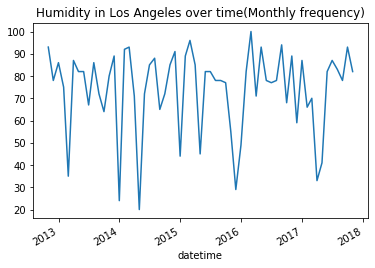

In [18]:
# asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
data2['Los Angeles'].asfreq('M').plot()
plt.title('Humidity in Los Angeles over time(Monthly frequency)')
plt.show()

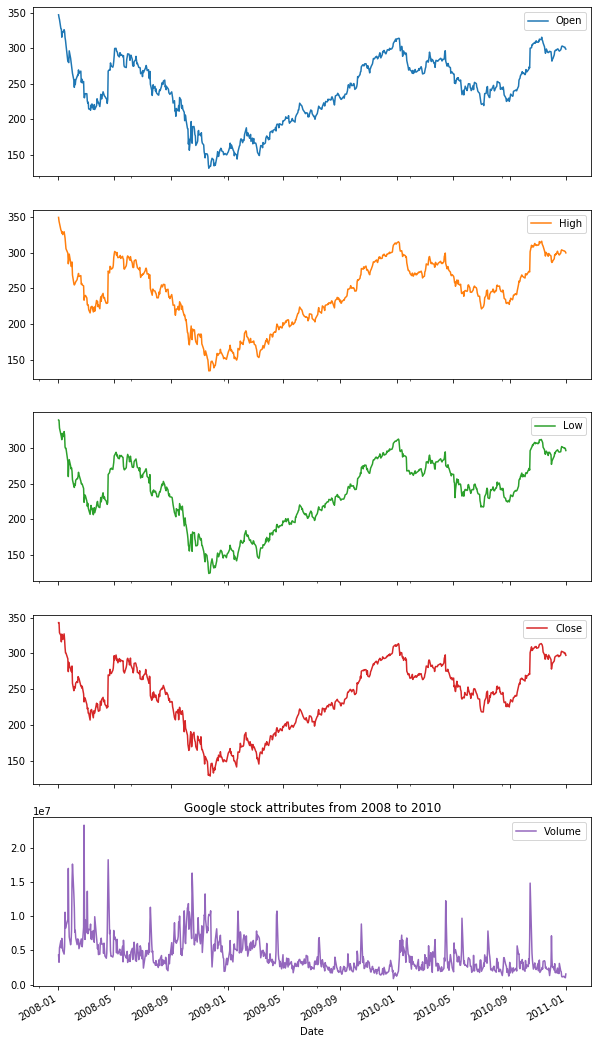

In [99]:
data1['2008': '2010'].plot(subplots = True, figsize = (10, 20))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

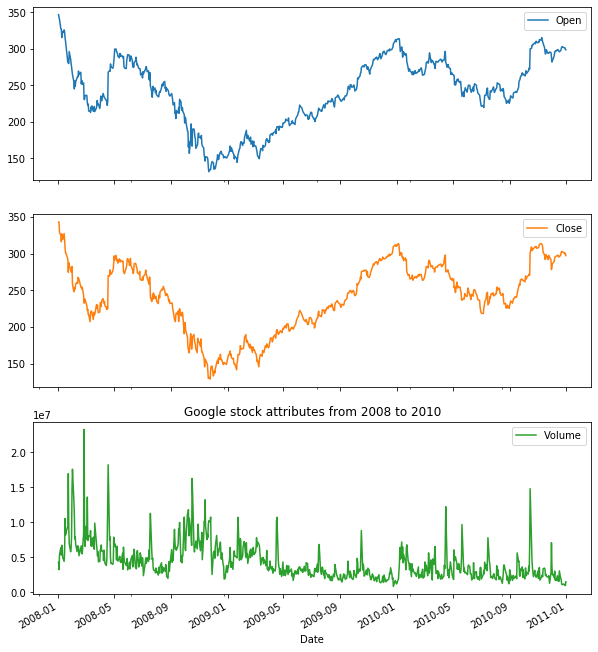

In [98]:
data1.loc['2008': '2010', ['Open', 'Close', 'Volume']].plot(subplots = True, figsize = (10, 12))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

### Timestamps and Periods

- Timestamps are used to represent a point in time. 

- Periods represent an interval in time. Periods can used to check if a specific event in the given period. 
- They can also be converted to each other's form.

In [103]:
# Creating a timestamp
timestamp = pd.Timestamp(2017, 1, 14 , 12)
timestamp

Timestamp('2017-01-14 12:00:00')

In [104]:
# Creating a Period
period = pd.Period('2017-01-14')
period

Period('2017-01-14', 'D')

In [105]:
period.start_time

Timestamp('2017-01-14 00:00:00')

In [106]:
period.end_time

Timestamp('2017-01-14 23:59:59.999999999')

In [107]:
# Checking if timestamp occured in a particular period
period.start_time < timestamp < period.end_time

True

In [108]:
# Converting timestamp to period
new_period = timestamp.to_period(freq = 'H')
new_period

Period('2017-01-14 12:00', 'H')

In [109]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq = 'H', how = 'start')
new_timestamp

Timestamp('2017-01-14 00:00:00')

### Using date_range

`date_range is a method that returns a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.`

In [119]:
# Creating a datetime index with daily frequency
dr1 = pd.date_range('1/1/2018', '1/9/2018')          #note middle value 1(month)/1(date)/2018(year) it adjusts
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [121]:
# Creating a datetime index with monthly frequency
dr2 = pd.date_range('1/1/2018', '10/1/2019' ,freq = 'M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [126]:
# Creating a datetime with specifying periods without specifying end date
dr3 = pd.date_range('1/14/2018', periods = 8)
dr3

DatetimeIndex(['2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19', '2018-01-20', '2018-01-21'],
              dtype='datetime64[ns]', freq='D')

In [127]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start = '2013-04-24', end = '2014-11-27', periods = 3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

### Using to_datetime

`pandas.to_datetime() is used for converting arguments to datetime. Here, a DataFrame is converted to a datetime series.`

In [129]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [130]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [131]:
# Note date 14 position
df = pd.to_datetime('01-14-2017')
df

Timestamp('2017-01-14 00:00:00')

In [133]:
# Note date 14 position pandas understands its date
df = pd.to_datetime('14-01-2017')
df

Timestamp('2017-01-14 00:00:00')

In [134]:
# Error code
# df = pd.to_datetime('14-14-2017')
# df

### Shifting and lags

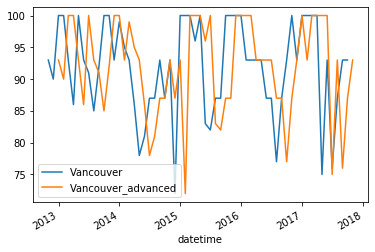

In [139]:
data2['Vancouver'].asfreq('M').plot(legend = True)
data2['Vancouver'].asfreq('M').shift(2).plot(legend = True)
plt.legend(['Vancouver', 'Vancouver_advanced'])
plt.show()

### Resampling

- `Upsampling` - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

- `Downsampling` - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [22]:
data3 = pd.read_csv('pressure.csv', index_col = 'datetime', parse_dates = ['datetime'])
data3.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [146]:
data3.isnull().sum()

Vancouver            4234
Portland                4
San Francisco         815
Seattle                13
Los Angeles           252
San Diego             175
Las Vegas              88
Phoenix               594
Albuquerque           456
Denver                543
San Antonio            17
Dallas                 60
Houston                 9
Kansas City           121
Minneapolis            17
Saint Louis            68
Chicago               725
Nashville             147
Indianapolis          289
Atlanta                49
Detroit                 5
Jacksonville           15
Charlotte               3
Miami                 794
Pittsburgh             46
Toronto               175
Philadelphia            4
New York             1041
Montreal              994
Boston                  7
Beersheba             806
Tel Aviv District     930
Eilat                 792
Haifa                 798
Nahariyya             795
Jerusalem             799
dtype: int64

In [147]:
data3 = data3[1:]
data3.fillna(method = 'ffill')
data3.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,NaN,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [148]:
data3 = data3.fillna(method = 'bfill')
data3.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,807.0,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [149]:
data3.isnull().sum()

Vancouver            792
Portland               0
San Francisco        792
Seattle                0
Los Angeles            0
San Diego              0
Las Vegas              0
Phoenix                0
Albuquerque            0
Denver                 0
San Antonio            0
Dallas                 0
Houston                0
Kansas City            0
Minneapolis            0
Saint Louis            0
Chicago                0
Nashville              0
Indianapolis           0
Atlanta                0
Detroit                0
Jacksonville           0
Charlotte              0
Miami                792
Pittsburgh             0
Toronto                0
Philadelphia           0
New York             792
Montreal               0
Boston                 0
Beersheba            792
Tel Aviv District    792
Eilat                792
Haifa                792
Nahariyya            792
Jerusalem            792
dtype: int64

In [150]:
# We downsample from hourly to 3 day frequency aggregated using mean
data3 = data3.resample('3D').mean()
data3.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.796610,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.016949,1022.508475,1024.118644,...,1014.152542,1013.406780,999.474576,1013.677966,985.050847,1012.949153,1011.796610,1013.000000,1013.000000,990.525424
2012-10-04,1016.527778,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1013.902778,1019.750000,1020.666667,...,1018.097222,1017.680556,1015.902778,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1010.319444,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.722222,1005.569444,1020.458333,...,1017.958333,1016.750000,1015.319444,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1012.694444,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1007.208333,977.750000,984.486111,...,1018.694444,1017.638889,1012.861111,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,999.333333,1018.111111,1021.069444,1015.930556,1017.277778,1018.361111,1015.666667,1015.458333,1013.444444,1010.444444,...,1025.055556,1024.222222,1020.583333,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [151]:
# Shape after resampling
data3.shape

(629, 36)

In [152]:
# Much less rows are left. Now, we will upsample from 3 day frequency to daily frequency
data3 = data3.resample('D').pad()
data3.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.796610,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.016949,1022.508475,1024.118644,...,1014.152542,1013.406780,999.474576,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-02,931.796610,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.016949,1022.508475,1024.118644,...,1014.152542,1013.406780,999.474576,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-03,931.796610,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.016949,1022.508475,1024.118644,...,1014.152542,1013.406780,999.474576,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-04,1016.527778,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1013.902778,1019.750000,1020.666667,...,1018.097222,1017.680556,1015.902778,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333
2012-10-05,1016.527778,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1013.902778,1019.750000,1020.666667,...,1018.097222,1017.680556,1015.902778,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333


In [153]:
data3.shape

(1885, 36)

Thanks
References
https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series